# Mask Creator GUI for pyGCxGC

This notebook demonstrates how to use the pyGCxGC Mask Creator GUI to create masks for 2D chromatograms.

In [7]:
import pyGCxGC as gcgc
import numpy as np
import matplotlib.pyplot as plt

## Loading a Chromatogram

First, let's load a sample chromatogram that we can later use with the GUI:

In [8]:
# Load an example chromatogram
Chromatogram = gcgc.parse_2D_chromatogram(
    'example_data/example_chromatograms/Example_FID.csv', 
    modulation_time=20,
    sampling_interval='infer', 
    shift=0,
    normalize='volume', 
    solvent_cutoff=0
)

# Display basic information about the chromatogram
print(f"Chromatogram: {Chromatogram.name}")
print(f"Shape: {Chromatogram.chrom_2D.shape}")
print(f"Modulation time: {Chromatogram.modulation_time} s")
print(f"Sampling interval: {Chromatogram.sampling_interval} ms")
print(f"Plot limits: {Chromatogram.limits}")

Chromatogram: Example_FID.csv
Shape: (5000, 317)
Modulation time: 20 s
Sampling interval: 4.0 ms
Plot limits: [np.float64(0.0), np.float64(105.99986666666665), np.float64(0.0), np.float64(19.996)]


## Visualizing the Chromatogram

Before using the GUI, let's visualize the chromatogram to better understand what we'll be working with:

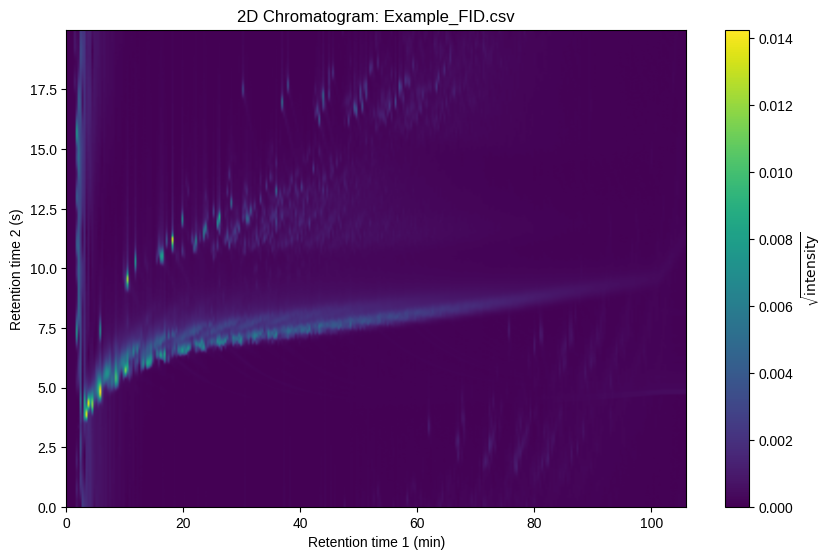

In [9]:
# Plot the chromatogram
plt.figure(figsize=(10,10/1.615))
plt.imshow(
    np.sqrt(Chromatogram.chrom_2D), 
    cmap='viridis', 
    extent=Chromatogram.limits, 
    interpolation='bilinear', 
    aspect='auto'
)
plt.xlabel('Retention time 1 (min)')
plt.ylabel('Retention time 2 (s)')
plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
plt.xlim(0,106)
plt.title(f'2D Chromatogram: {Chromatogram.name}')
plt.show()

## Using the Mask Creator GUI

Now we can launch the Mask Creator GUI to interactively create masks for our chromatogram.

The GUI allows you to:
1. Load a chromatogram
2. Draw regions of interest using rectangle or lasso selection tools
3. Add these selections to a mask
4. Save the mask as a .tif file for later use with pyGCxGC's masking functions

To launch the GUI, simply call:

In [10]:
# Launch the mask creator GUI
# Note: If you encounter issues with the GUI generating multiple colorbars,
# this is a known limitation in the current version
gcgc.launch_mask_creator()

## GUI Usage Instructions

Here's how to use the Mask Creator GUI:

1. **Load a Chromatogram**: Click the "Load Chromatogram File" button and select your .csv file. 
   You'll be prompted to enter the modulation time in seconds.

2. **Adjust Plotting (Optional)**: 
   - **Shift**: Enter a shift value to adjust the phase of the chromatogram
   - **Transform**: Choose how to display the chromatogram data:
     - **Raw**: Display the original intensity values without transformation
     - **Square Root**: Display the square root of intensity values (default, better for visualization)
     - **Third Root**: Display the third root of intensity values (emphasizes lower intensity features)
   - Click **Apply** to apply both shift and transform changes

3. **Select a Drawing Tool**: Choose between "Rectangle", "Lasso", or "Polygon" tools for drawing your mask regions.

4. **Create a Selection**: 
   - With the Rectangle tool: Click and drag to create a rectangular selection
   - With the Lasso tool: Click and drag to create a free-form selection
   - With the Polygon tool: Click to add points, and close the polygon by clicking near the first point

5. **Add Selection to Mask**: After drawing a selection, click "Add Selection to Mask" to include it in your mask.

6. **Name Your Mask**: Enter a descriptive name for your mask in the "Mask Name" field.

7. **Save Your Mask**: Click "Save Mask" to export your mask as a .tif file.

8. **Navigation**: Use the toolbar at the bottom to pan, zoom, and navigate the chromatogram.

### Transform Options

The transform options in the Plotting section allow you to change how the chromatogram intensity data is displayed:

- **Raw**: Shows the original intensity values. Best for quantitative analysis but may have poor contrast for low-intensity features.
- **Square Root** (default): Shows the square root of intensity values. This is the most commonly used transform as it compresses the dynamic range and provides good visualization of both high and low intensity features.
- **Third Root**: Shows the third root of intensity values. This provides even more compression of the dynamic range, making very low intensity features more visible.

The colorbar label automatically updates to reflect the current transform mode.



## Using the Created Mask

After creating and saving a mask using the GUI, you can load it and use it with your chromatogram:

In [11]:
# Example code to use a saved mask
# Replace 'path_to_mask.tif' with your actual saved mask file path
# masked_chromatogram = gcgc.mask_chromatogram(Chromatogram.chrom_2D, 'path_to_mask.tif')

# Plot the masked chromatogram
# plt.figure(figsize=(10,10/1.615))
# plt.imshow(np.sqrt(masked_chromatogram), cmap='viridis', extent=Chromatogram.limits, 
#            interpolation='bilinear', aspect='auto')
# plt.xlabel('Retention time 1 (min)')
# plt.ylabel('Retention time 2 (s)')
# plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
# plt.xlim(0,106)
# plt.title('Masked Chromatogram')
# plt.show()

In [12]:
# Example code to integrate multiple masks
# If you have multiple masks in a folder, you can integrate them all at once:
# results = gcgc.integrate_masks(
#     Chromatogram.chrom_2D, 
#     masks='path_to_masks_folder/',
#     mask_names='infer'
# )

# Display the results as a DataFrame
# import pandas as pd
# results_df = pd.DataFrame([results], index=['Sample 1'])
# results_df